In [ ]:
import tensorflow as tf
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from tensorflow.keras import  layers, models

In [ ]:
df = pd.read_csv('age_gender.csv')

In [ ]:
df.shape

(23705, 5)

In [ ]:
df.head()

,age,ethnicity,gender,img_name,pixels
0,1,2,0,20161219203650636.jpg.chip.jpg,129 128 128 126 127 130 133 135 139 142 145 14...
1,1,2,0,20161219222752047.jpg.chip.jpg,164 74 111 168 169 171 175 182 184 188 193 199...
2,1,2,0,20161219222832191.jpg.chip.jpg,67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3,1,2,0,20161220144911423.jpg.chip.jpg,193 197 198 200 199 200 202 203 204 205 208 21...
4,1,2,0,20161220144914327.jpg.chip.jpg,202 205 209 210 209 209 210 211 212 214 218 21...


In [ ]:
print(df['pixels'][0].split(' '))

['129', '128', '128', '126', '127', '130', '133', '135', '139', '142', '145', '149', '147', '145', '146', '147', '148', '149', '149', '150', '153', '153', '153', '152', '153', '153', '153', '153', '153', '151', '149', '147', '146', '146', '144', '143', '140', '134', '129', '129', '126', '122', '121', '119', '118', '118', '99', '53', '130', '129', '128', '126', '127', '130', '135', '141', '143', '143', '144', '145', '143', '142', '144', '145', '146', '149', '149', '148', '151', '151', '151', '151', '152', '153', '153', '153', '153', '149', '148', '147', '146', '146', '142', '141', '138', '133', '130', '130', '128', '123', '124', '122', '120', '117', '98', '52', '131', '129', '130', '129', '129', '134', '138', '144', '145', '143', '143', '139', '140', '138', '139', '140', '142', '145', '147', '149', '151', '149', '149', '149', '151', '152', '151', '150', '150', '148', '147', '145', '144', '142', '140', '137', '136', '135', '134', '131', '128', '126', '126', '123', '122', '114', '97', '50

In [ ]:
np.sqrt(2304)

48.0

In [ ]:
im_h = 48
im_w = 48
labels = ['age','ethnicity','gender']

In [ ]:
df = df.drop('img_name',axis=1)

In [ ]:
X = df.drop(labels,axis=1)
y = df[labels]

In [ ]:
X = pd.Series(X['pixels'])
X = X.apply(lambda x: x.split(' '))

In [ ]:
X = X.apply(lambda x: np.array(list(map(lambda z: np.int(z),x))))
X.shape 

(23705,)

In [ ]:
X = np.array(X)
X = np.stack(X,axis=0)
X = X / 255

In [ ]:
X = X.reshape(-1,48,48,1)

0


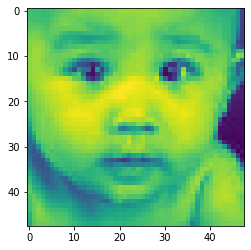

In [ ]:
print(y.gender[0])
plt.imshow(X[0,:,:])


In [ ]:
{column: list(df[column].unique()) for column in ['gender', 'ethnicity', 'age']}

{'age': [1,
  10,
  100,
  101,
  103,
  105,
  11,
  110,
  111,
  115,
  116,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  2,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  3,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  4,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  5,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  6,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  7,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  8,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  9,
  90,
  91,
  92,
  93,
  95,
  96,
  99],
 'ethnicity': [2, 3, 4, 0, 1],
 'gender': [0, 1]}

In [ ]:
y_gender = np.array(y['gender'])
y_ethnicity = np.array(y['ethnicity'])
y_age = np.array(y['age'])

In [ ]:
from sklearn.model_selection import train_test_split
X_gender_train,X_gender_test,y_gender_train,y_gender_test = train_test_split(X,y_gender,test_size=0.2)
X_ethnicity_train,X_ethnicity_test,y_ethnicity_train,y_ethnicity_test = train_test_split(X,y_ethnicity,test_size=0.2)
X_age_train,X_age_test,y_age_train,y_age_test = train_test_split(X,y_age,test_size=0.2)

In [ ]:
num_epochs = 5
learning_rate = 0.001

In [ ]:
def build_model(input_shape,classes,epochs, activation, loss):
   model = tf.keras.Sequential()
   model.add(tf.keras.layers.Input(input_shape))
   model.add(layers.Conv2D(16,3,padding='same',activation='relu'))
   model.add(layers.MaxPool2D())
   model.add(layers.Conv2D(32,3,padding='same',activation='relu'))
   model.add(layers.MaxPool2D())
   model.add(layers.Conv2D(64,3,padding='same',activation='relu'))
   model.add(layers.MaxPool2D())
   model.add(layers.Flatten())
   model.add(layers.Dense(64*6*6,activation='relu',))
   model.add(layers.Dense(classes,activation=activation))

   model.compile(optimizer = 'Adam',
                 loss = loss,
                 metrics=['accuracy'])
   return model

In [ ]:
gender_model = build_model(X_gender_train.shape[1:],2,epochs=num_epochs,activation='sigmoid',loss='sparse_categorical_crossentropy')

In [ ]:
gender_model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 48, 48, 16)        160       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 24, 24, 16)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 24, 24, 32)        4640      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 12, 12, 64)        18496     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 2304)             

In [ ]:
gender_history = gender_model.fit(X_gender_train,
    y_gender_train,
    batch_size=32,
    validation_split=0.2,
    epochs = 5
    )


Epoch 1/5
475/475 [==============================] - 55s 115ms/step - loss: 0.4407 - accuracy: 0.7815 - val_loss: 0.4153 - val_accuracy: 0.8099
Epoch 2/5
475/475 [==============================] - 55s 116ms/step - loss: 0.3126 - accuracy: 0.8583 - val_loss: 0.3240 - val_accuracy: 0.8526
Epoch 3/5
475/475 [==============================] - 55s 115ms/step - loss: 0.2743 - accuracy: 0.8749 - val_loss: 0.2890 - val_accuracy: 0.8729
Epoch 4/5
475/475 [==============================] - 55s 116ms/step - loss: 0.2509 - accuracy: 0.8897 - val_loss: 0.3333 - val_accuracy: 0.8619
Epoch 5/5
475/475 [==============================] - 55s 116ms/step - loss: 0.2314 - accuracy: 0.8997 - val_loss: 0.3041 - val_accuracy: 0.8793


In [ ]:
epochs = np.arange(0,5)
gender_history.history

{'accuracy': [0.7814909815788269,
  0.8583481907844543,
  0.8748928904533386,
  0.8897238373756409,
  0.8997429013252258],
 'loss': [0.440736323595047,
  0.3125883936882019,
  0.2743362486362457,
  0.2509059011936188,
  0.23135380446910858],
 'val_accuracy': [0.8099129796028137,
  0.8526232242584229,
  0.8729237914085388,
  0.8618507981300354,
  0.87925124168396],
 'val_loss': [0.41531434655189514,
  0.3240482211112976,
  0.2889721095561981,
  0.33327624201774597,
  0.30412960052490234]}

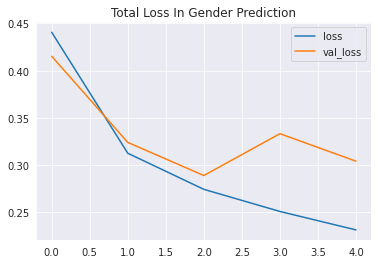

In [ ]:
sns.set_style('darkgrid')
col  = ['loss','val_loss']
for key in col:
  ax = sns.lineplot(x = epochs,y = gender_history.history[key], label=key)
ax.set_title('Total Loss In Gender Prediction')  
leg = ax.legend();

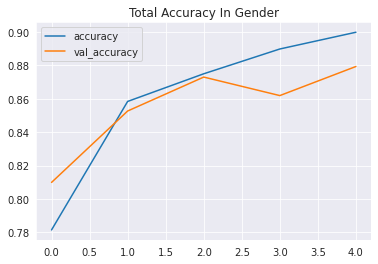

In [ ]:
sns.set_style('darkgrid')
col  = ['accuracy','val_accuracy']
for key in col:
  ax = sns.lineplot(x = epochs,y = gender_history.history[key], label=key)
ax.set_title('Total Accuracy In Gender')  
leg = ax.legend();

In [ ]:
gender_accuracy = gender_model.evaluate(X_gender_test,y_gender_test)

149/149 [==============================] - 4s 29ms/step - loss: 0.2775 - accuracy: 0.8794


In [ ]:
ethinicty_classes = len(np.unique(y_ethnicity))
ethinicty_classes

5

In [ ]:
ethinicty_model = build_model(X_ethnicity_train.shape[1:],ethinicty_classes,epochs=5,activation='softmax',loss='sparse_categorical_crossentropy')

In [ ]:
ethinicty_model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 48, 48, 16)        160       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 24, 24, 16)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 24, 24, 32)        4640      
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 12, 12, 64)        18496     
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 2304)             

In [ ]:
ethinicity_history = ethinicty_model.fit(X_ethnicity_train,y_ethnicity_train,
                                         batch_size=32,
                                         validation_split=0.2,
                                         epochs=5)


Epoch 1/5
475/475 [==============================] - 57s 119ms/step - loss: 1.0735 - accuracy: 0.6002 - val_loss: 0.8488 - val_accuracy: 0.6860
Epoch 2/5
475/475 [==============================] - 57s 121ms/step - loss: 0.7761 - accuracy: 0.7230 - val_loss: 0.7754 - val_accuracy: 0.7195
Epoch 3/5
475/475 [==============================] - 57s 121ms/step - loss: 0.6820 - accuracy: 0.7600 - val_loss: 0.7178 - val_accuracy: 0.7464
Epoch 4/5
475/475 [==============================] - 57s 120ms/step - loss: 0.6235 - accuracy: 0.7812 - val_loss: 0.6652 - val_accuracy: 0.7685
Epoch 5/5
475/475 [==============================] - 57s 120ms/step - loss: 0.5678 - accuracy: 0.8010 - val_loss: 0.6661 - val_accuracy: 0.7611


In [ ]:
ethinicity_history.history

{'accuracy': [0.6001582145690918,
  0.7230241894721985,
  0.760002613067627,
  0.7812273502349854,
  0.8010019063949585],
 'loss': [1.0734879970550537,
  0.7761379480361938,
  0.6819728016853333,
  0.6235200762748718,
  0.5677881240844727],
 'val_accuracy': [0.6860005259513855,
  0.7194832563400269,
  0.7463749051094055,
  0.7685209512710571,
  0.761138916015625],
 'val_loss': [0.8487730622291565,
  0.7754175066947937,
  0.7178142666816711,
  0.6651668548583984,
  0.6660594344139099]}

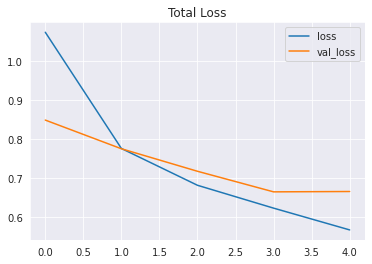

In [ ]:
sns.set_style('darkgrid')
col  = ['loss','val_loss']
for key in col:
  ax = sns.lineplot(x = epochs,y = ethinicity_history.history[key], label=key)
ax.set_title('Total Loss')  
leg = ax.legend();

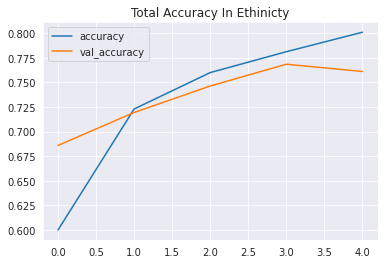

In [ ]:
sns.set_style('darkgrid')
col  = ['accuracy','val_accuracy']
for key in col:
  ax = sns.lineplot(x = epochs,y = ethinicity_history.history[key], label=key)
ax.set_title('Total Accuracy In Ethinicty')  
leg = ax.legend();

In [ ]:
ethinicty_accuracy = ethinicty_model.evaluate(X_ethnicity_test,y_ethnicity_test)

149/149 [==============================] - 4s 29ms/step - loss: 0.7077 - accuracy: 0.7623


In [ ]:
def build_age_model(input_shape,classes,epochs, activation, loss):
   model = tf.keras.Sequential()
   model.add(tf.keras.layers.Input(input_shape))
   model.add(layers.Conv2D(16,3,padding='same',activation='relu'))
   model.add(layers.MaxPool2D())
   model.add(layers.Conv2D(32,3,padding='same',activation='relu'))
   model.add(layers.MaxPool2D())
   model.add(layers.Conv2D(64,3,padding='same',activation='relu'))
   model.add(layers.MaxPool2D())
   model.add(layers.Flatten())
   model.add(layers.Dense(64*6*6,activation='relu',))
   model.add(layers.Dense(classes,activation=activation))

   model.compile(optimizer = 'Adam',
                 loss = loss,
                 metrics=['mae'])
   return model

In [ ]:
age_model = build_age_model(X_age_train.shape[1:],1,epochs=5,activation='relu',loss='mse')

In [ ]:
age_history = age_model.fit(X_age_train,y_age_train,
                                         batch_size=32,
                                         validation_split=0.2,
                                         epochs=5)

Epoch 1/5
475/475 [==============================] - 57s 120ms/step - loss: 394.3516 - mae: 15.0091 - val_loss: 214.5247 - val_mae: 11.0454
Epoch 2/5
475/475 [==============================] - 56s 119ms/step - loss: 194.8406 - mae: 10.4699 - val_loss: 170.1240 - val_mae: 9.4553
Epoch 3/5
475/475 [==============================] - 56s 119ms/step - loss: 150.8868 - mae: 9.1051 - val_loss: 148.9954 - val_mae: 8.7843
Epoch 4/5
475/475 [==============================] - 56s 119ms/step - loss: 125.6591 - mae: 8.2676 - val_loss: 129.5149 - val_mae: 8.1056
Epoch 5/5
475/475 [==============================] - 56s 119ms/step - loss: 111.0433 - mae: 7.7732 - val_loss: 121.2877 - val_mae: 7.8668


In [ ]:
mse,mae = age_model.evaluate(X_age_test,y_age_test)

149/149 [==============================] - 4s 29ms/step - loss: 119.8617 - mae: 7.8394


In [ ]:
print('Mean Squared Error: {} '.format(mse))
print('Mean Absolute Error: {}'.format(mae) )

Mean Squared Error: 119.86165618896484 
Mean Absolute Error: 7.8394036293029785


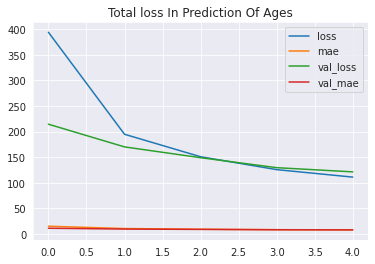

In [ ]:
col  = age_history.history.keys()
for key in col:
  ax = sns.lineplot(x = epochs,y = age_history.history[key], label=key)
ax.set_title('Total loss In Prediction Of Ages')
leg = ax.legend();

In [ ]:
test_losses = age_model.evaluate(X_age_test,y_age_test)

149/149 [==============================] - 4s 29ms/step - loss: 119.8617 - mae: 7.8394
